In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
data_train_path = 'pet_expression/train'
data_test_path = 'pet_expression/test'
data_valid_path = 'pet_expression/valid'

In [3]:
img_width = 180
img_height = 180 

In [4]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    tf.keras.layers.RandomTranslation(0.2, 0.2), 
    layers.RandomContrast(0.2)
])

In [5]:
raw_data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32
)

Found 1000 files belonging to 4 classes.


In [6]:
data_class=raw_data_train.class_names
data_class
data_cat = len(raw_data_train.class_names)
print("Class names:", data_class)
print("Number of classes (data_cat):", data_cat)


Class names: ['Angry', 'Other', 'Sad', 'happy']
Number of classes (data_cat): 4


In [7]:
data_train = raw_data_train.map(lambda x, y: (data_augmentation(x), y))

In [8]:
data_val = tf.keras.utils.image_dataset_from_directory(data_valid_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 36 files belonging to 4 classes.


In [9]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 38 files belonging to 4 classes.


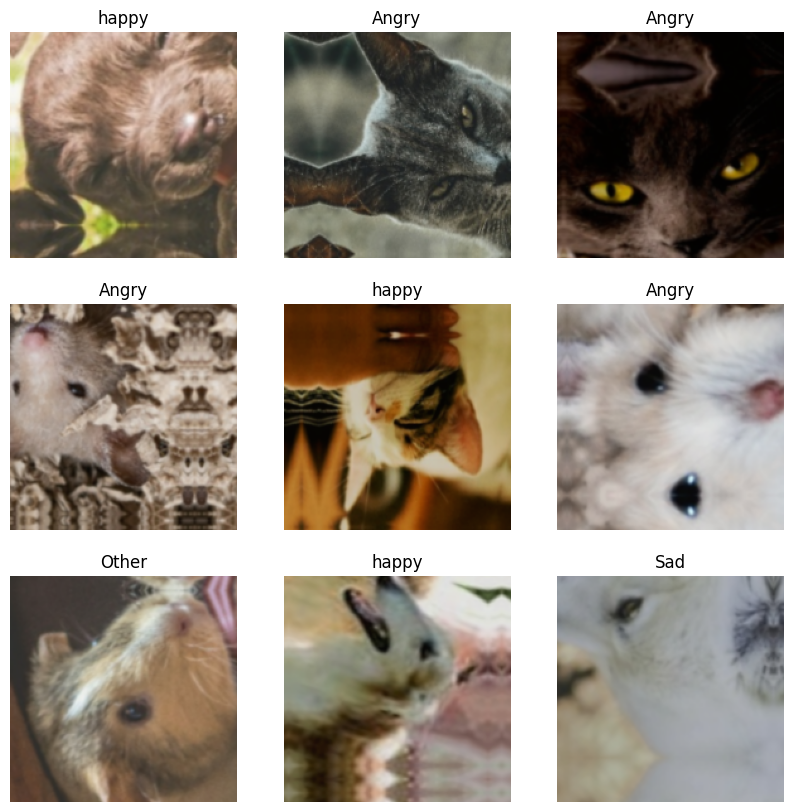

In [10]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_class[labels[i]])
        plt.axis('off')

In [11]:
from tensorflow.keras.models import Sequential

In [36]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(img_width, img_height, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(data_cat, activation='softmax')
])


In [37]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [38]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_4 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 118336)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 118336)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │       7,573,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,593,220 (28.97 MB)

 Trainable params: 7,593,220 (28.97 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
epochs_size = 50
history = model.fit(
    data_train,
    validation_data=data_val,
    epochs=epochs_size,
    
)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 374ms/step - accuracy: 0.2456 - loss: 1.4363 - val_accuracy: 0.3056 - val_loss: 1.3888
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 382ms/step - accuracy: 0.2219 - loss: 1.3957 - val_accuracy: 0.2778 - val_loss: 1.3862
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 375ms/step - accuracy: 0.2409 - loss: 1.3853 - val_accuracy: 0.3056 - val_loss: 1.3804
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 372ms/step - accuracy: 0.2292 - loss: 1.3853 - val_accuracy: 0.3056 - val_loss: 1.3712
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 373ms/step - accuracy: 0.2312 - loss: 1.3859 - val_accuracy: 0.3056 - val_loss: 1.3689
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 373ms/step - accuracy: 0.2498 - loss: 1.3873 - val_accuracy: 0.3056 - val_loss: 1.3712
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 372ms/step - accuracy: 0.2648 - loss: 1.3803 - val_accuracy: 0.2778 - val_loss: 1.3845
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 373ms/step - accuracy: 0.2685 - loss: 1.3860 - val_accu

Text(0.5, 1.0, 'Loss')

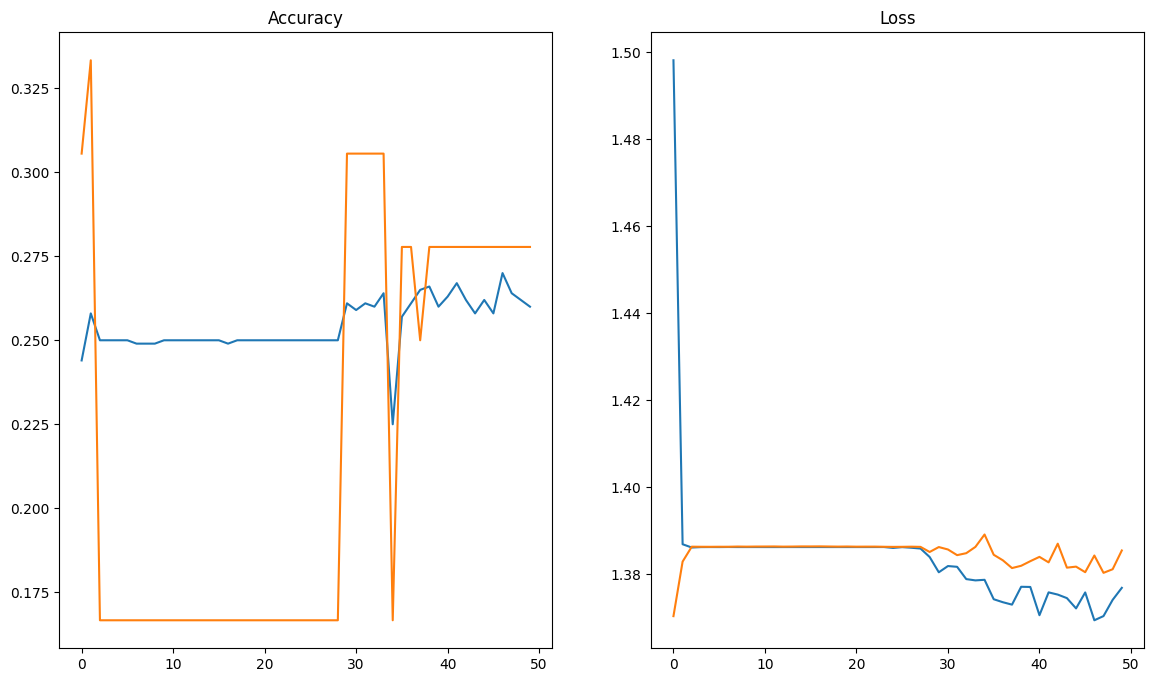

In [28]:
epochs_range = range(epochs_size)
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

Text(0.5, 1.0, 'Loss')

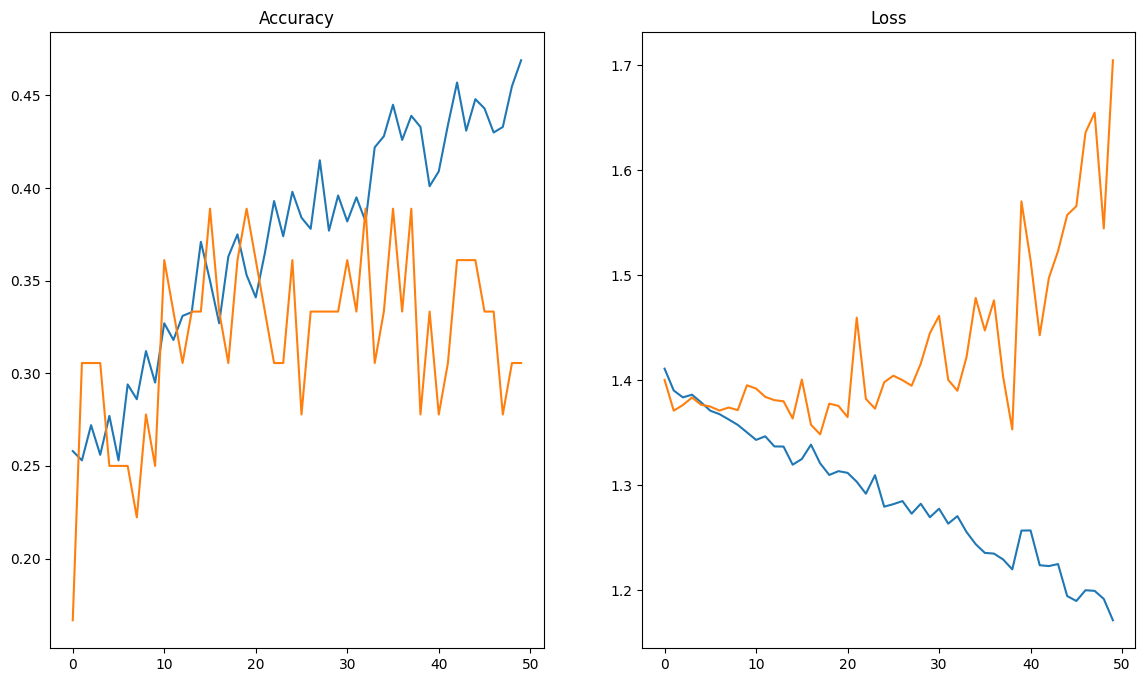

In [21]:
epochs_range = range(epochs_size)
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')